# My first text detector using TensorFlow



In [5]:
import tensorflow as tf

# Mnist -> 28x28 images of hand-written digits
mnist = tf.keras.datasets.mnist 

# We load the date in train and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


## Show the data
Lets show a value from the dataset for better understanding

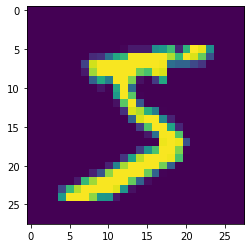

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

## Normalize the datasets
Let's normalize the datasets for better performance

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

## Build and fit the model

In [10]:
# I will use a Sequential model, more info
# https://www.tensorflow.org/guide/keras/sequential_model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# Output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 1s 643us/step - loss: 0.2663 - accuracy: 0.9213
Epoch 2/3
1875/1875 [==============================] - 1s 685us/step - loss: 0.1073 - accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 1s 643us/step - loss: 0.0729 - accuracy: 0.9770


## Evaluate the model
In order to evaluate the performance of our model, let's show the validation loss and validation accuracy values.

In [24]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 417us/step - loss: 0.0907 - accuracy: 0.9708


[0.0906502828001976, 0.97079998254776]

## Save and load
If we want to save the model we would use:

In [15]:
# Here we save the model
model.save('my_number_reader.model')

# Here we load the model
new_model = tf.keras.models.load_model('my_number_reader.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_number_reader.model\assets


## Check predictions
In order to see which number is reading, we need to use numpy (we could use tensorflow, but in this case we will use np)

The number is a: 4


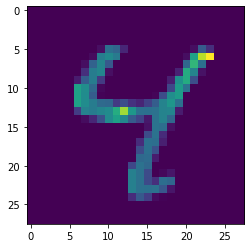

In [25]:
import numpy as np

# Produce the predictions
predictions = new_model.predict([x_test])
position_to_predict = 6

# We display which number our model has predicted for a specific position
print("The number is a: " + str(np.argmax(predictions[position_to_predict])))

# And we display the number using plt imshow
plt.imshow(x_test[position_to_predict])